In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
digits.target.shape

(1797,)

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.shape

(1797, 8, 8)

6


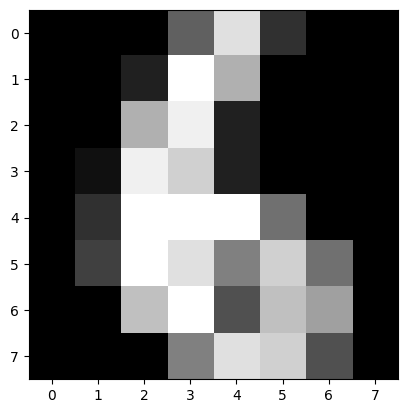

In [ ]:
import matplotlib.pyplot as plt
index = 195
x = digits.images[index]
print(digits.target[index])
plt.gray()
plt.imshow(x)
plt.show()

# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [ ]:
print(f"Feature => Train: {X_train.shape} - Test: {X_test.shape}")
print(f"Label => Train: {y_train.shape} - Test: {y_test.shape}")

Feature => Train: (1257, 64) - Test: (540, 64)
Label => Train: (1257,) - Test: (540,)


In [ ]:
X_train[0]

array([ 0.,  0.,  9., 16., 13.,  1.,  0.,  0.,  0.,  8., 16.,  8., 11.,
        8.,  0.,  0.,  0., 11., 10.,  0.,  8., 10.,  0.,  0.,  0.,  1.,
        5.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,
        0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  4., 14.,
       15.,  7.,  4.,  1.,  0.,  0.,  8., 16., 16., 16., 16., 12.])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.5625    , 1.        , 0.8125    ,
       0.0625    , 0.        , 0.        , 0.        , 0.5       ,
       1.        , 0.5       , 0.6875    , 0.5       , 0.        ,
       0.        , 0.        , 0.6875    , 0.625     , 0.        ,
       0.5       , 0.625     , 0.        , 0.        , 0.        ,
       0.06666667, 0.3125    , 0.        , 0.6875    , 0.6875    ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.8125    , 0.5625    , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25      , 1.        ,
       0.125     , 0.        , 0.        , 0.        , 0.        ,
       0.25      , 0.875     , 0.9375    , 0.4375    , 0.25      ,
       0.1       , 0.        , 0.        , 0.5       , 1.        ,
       1.        , 1.        , 1.        , 0.75      ])

# Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
  acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
  acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

  p = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
  r = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

  print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}")
  return acc_train, acc_test, p, r

# 1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.8305489260143198 - acc_test: 0.8148148148148148 - precision: 0.855451015921667 - recall: 0.8148148148148148


# 2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [ ]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9896579156722355 - acc_test: 0.9722222222222222 - precision: 0.973710093265178 - recall: 0.9722222222222222


# 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_split=4)

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9856801909307876 - acc_test: 0.8611111111111112 - precision: 0.8608791959544512 - recall: 0.8611111111111112


# 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=64, min_samples_split=4)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=4, n_estimators=1000)

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc_test: 0.9611111111111111 - precision: 0.9630311641755186 - recall: 0.9611111111111111


# 5. SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9992044550517104 - acc_test: 0.9851851851851852 - precision: 0.9854520332262079 - recall: 0.9851851851851852


# 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9864757358790772 - acc_test: 0.9592592592592593 - precision: 0.9613394150431186 - recall: 0.9592592592592593


# 7. ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=64)
ann.fit(X_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=512)

In [ ]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc_test: 0.9777777777777777 - precision: 0.9786452621692713 - recall: 0.9777777777777777


# Comparison

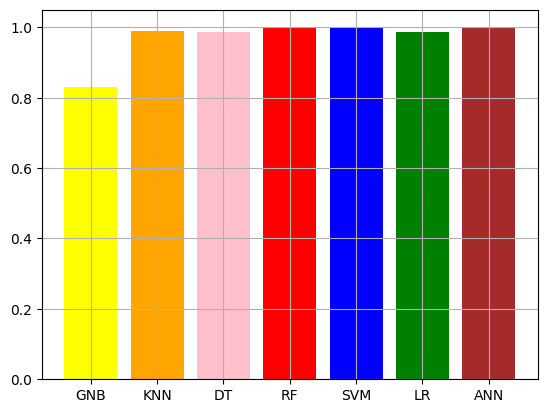

In [ ]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

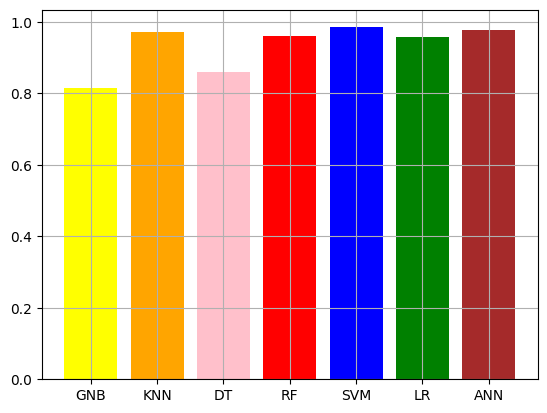

In [ ]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

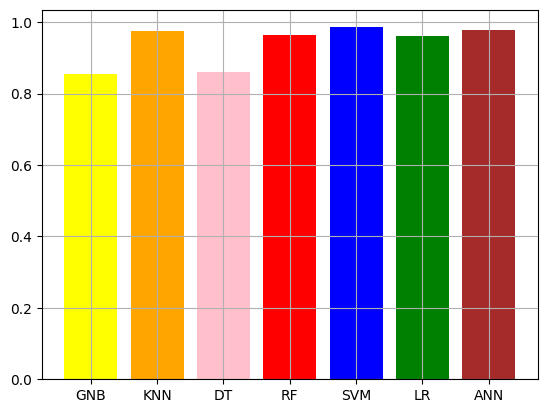

In [ ]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

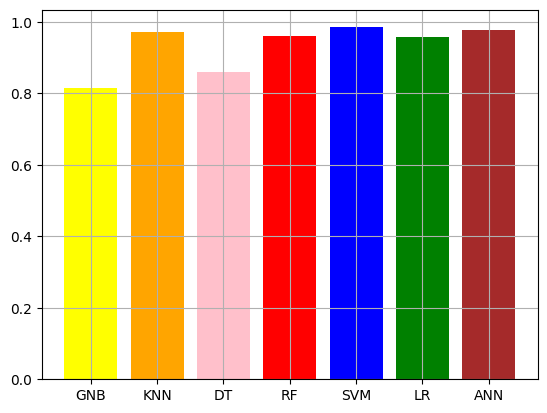

In [ ]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()